In [2]:
import numpy as np
from scipy.signal import correlate2d
from skimage.io import imread
import matplotlib.pyplot as plt
import seam_carve

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


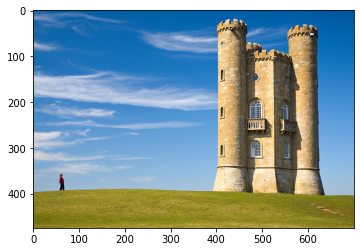

In [4]:
img = imread('castle.png')
plt.imshow(img)

# Find gradients

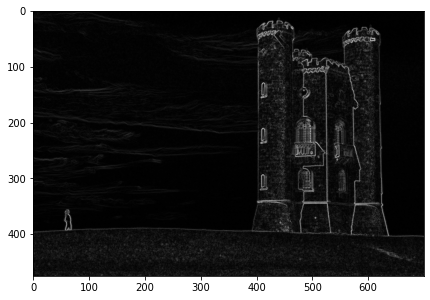

In [5]:
img_grad = seam_carve.get_grad(img)
plt.figure(figsize=(7,7))
plt.imshow(img_grad, cmap='gray')

# Seam carving

Vertical seam

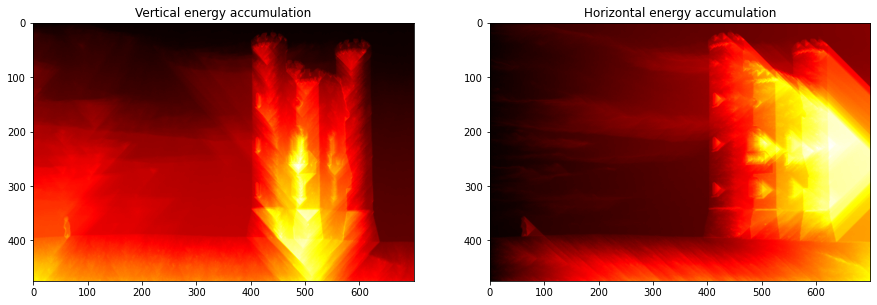

In [6]:
img_venergy = seam_carve.get_vertical_energy(img_grad)
img_henergy = seam_carve.get_horizontal_energy(img_grad)

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title('Vertical energy accumulation')
plt.imshow(img_venergy, cmap='hot')

plt.subplot(1,2,2)
plt.title('Horizontal energy accumulation')
plt.imshow(img_henergy, cmap='hot')

Seam demo

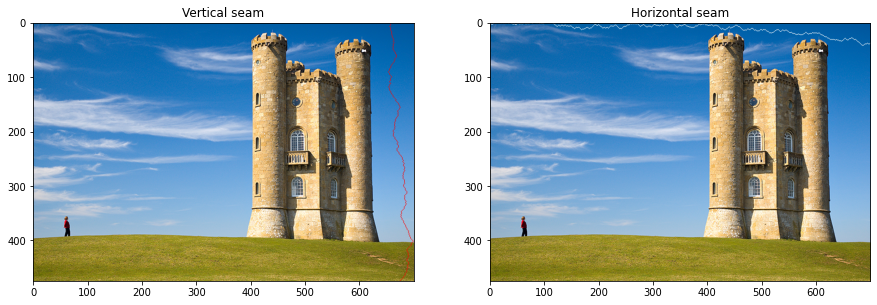

In [7]:
res = np.copy(img)
vseam = seam_carve.get_vertical_seam(img_venergy)
res[vseam, :] = [255, 0, 0]
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Vertical seam')
plt.imshow(res)

res1 = np.copy(img)
hseam = seam_carve.get_horizontal_seam(img_henergy)
res1[hseam, :] = [255, 255, 255]
plt.subplot(1,2,2)
plt.title('Horizontal seam')
plt.imshow(res1)

# Shrinking

In [8]:
from tqdm.notebook import tqdm

In [9]:
castle_mask = imread('castle_mask.png')
mask = (castle_mask[:,:,0] != 0)*-1 + castle_mask[:,:,1]

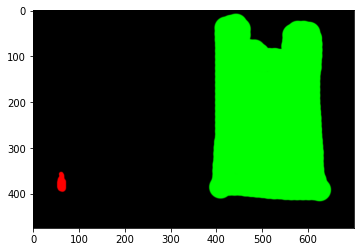

In [10]:
plt.imshow(castle_mask)

  0%|          | 0/200 [00:00<?, ?it/s]

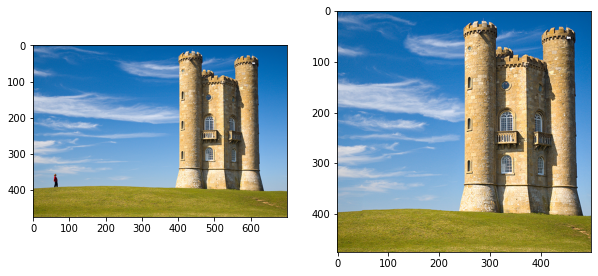

In [11]:
n = 200
res = np.copy(img)
res_mask = np.copy(mask)

for i in tqdm(range(n)):
    res, res_mask, _ = seam_carve.seam_carve(res, 'horizontal shrink', mask = res_mask)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(res)

# Expanding images up to 40%!

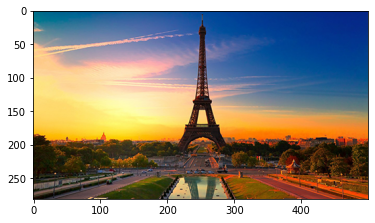

In [12]:
eifel = imread('eifel.png')
eifel_mask = imread('eifel_mask.png')
mask = (eifel_mask[:,:,0] != 0)*-1 + eifel_mask[:,:,1]
plt.imshow(eifel)

  0%|          | 0/200 [00:00<?, ?it/s]

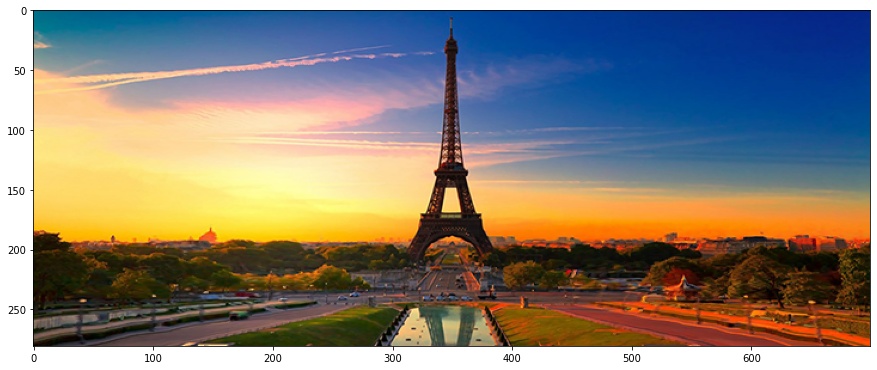

In [13]:
n = 200
res = np.copy(eifel)
res_mask = np.copy(mask)
for i in tqdm(range(n)):
    res, res_mask, _ = seam_carve.seam_carve(res, 'horizontal expand', res_mask)
plt.figure(figsize=(15,15))
plt.imshow(res)

  0%|          | 0/30 [00:00<?, ?it/s]

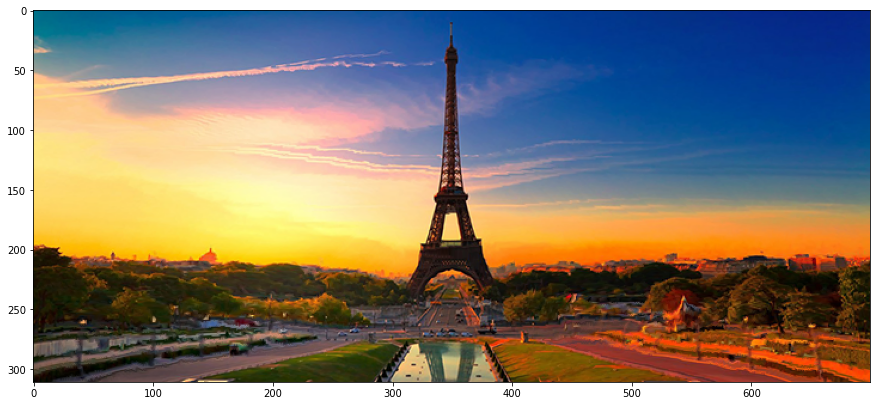

In [15]:
m = 30
res2 = np.copy(res)
res_mask2 = np.copy(res_mask)
for i in tqdm(range(m)):
    res2, res_mask2, _ = seam_carve.seam_carve(res2, 'vertical expand', res_mask2)
plt.figure(figsize=(15,15))
plt.imshow(res2)